# **Assignment 3**

Αρχιτεκτονική CNN

### Import libraries

In [ ]:
from tensorflow import keras #remember that keras is now included in tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
from keras import datasets, layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

### Download and prepare the CIFAR10 dataset

In [ ]:
print('>>> Downloading dataset...')
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print('>>> Dataset downloaded...')

>>> Downloading dataset...
170498071/170498071 [==============================] - 2s 0us/step
>>> Dataset downloaded...


In [ ]:
print(f'>>> We have {len(train_labels)} train images and {len(test_labels)} test images...')

# Normalize pixel values to be between 0 and 1
print('>>> Normalizing pixel values...')
train_images, test_images = train_images / 255.0, test_images / 255.0
print('>>> Pixel values normalized...')

>>> We have 50000 train images and 10000 test images...
>>> Normalizing pixel values...
>>> Pixel values normalized...


In [ ]:
# Create validation data
print('>>> Creating validation set...')
X_train, val_images, y_train, val_labels = train_test_split (train_images, train_labels, test_size=0.25, random_state=1) # 0.25 x 0.83 = 0.21
print('>>> Validation set created...')
print(f'>>> We have {len(y_train)} train images, {len(val_labels)} validation images and {len(test_labels)} test images...')

>>> Creating validation set...
>>> Validation set created...
>>> We have 37500 train images, 12500 validation images and 10000 test images...


## Version 1.0



---



### Plot 4 images of each class

Before doing anything else, let's plot 4 images of each class

>>> Plotting 4 images of each class based on actual class...


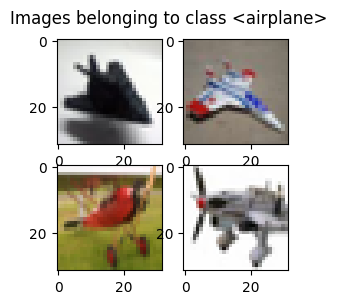

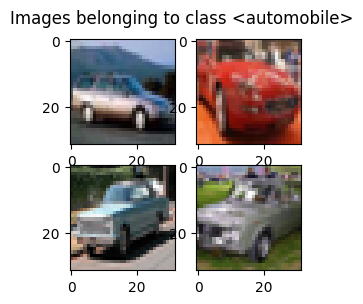

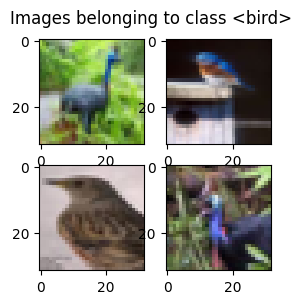

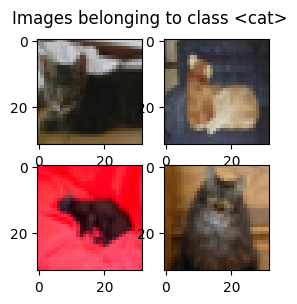

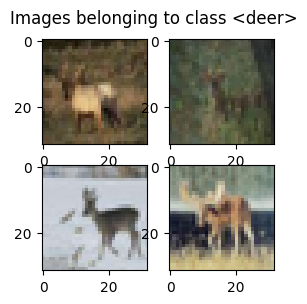

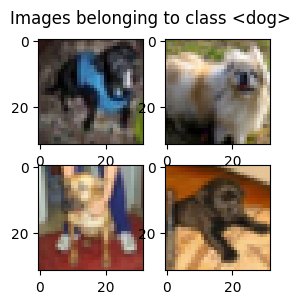

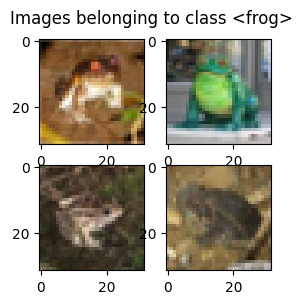

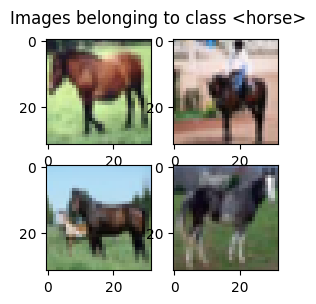

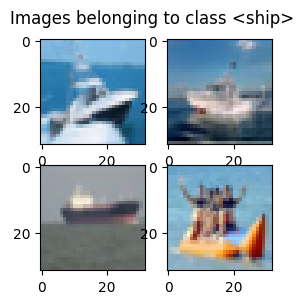

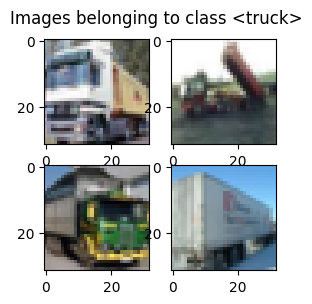

In [ ]:
print('>>> Plotting 4 images of each class based on actual class...')

# Store the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_to_demonstrate = 0
while (sum(train_labels == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(train_labels == class_to_demonstrate)

    # create new plot window
    # small figsize to see images more clearly
    plt.figure(figsize=(3,3))

    plt.subplot(221)
    plt.imshow(train_images[tmp_idxs_to_use[0][0]])
    plt.subplot(222)
    plt.imshow(train_images[tmp_idxs_to_use[0][1]])
    plt.subplot(223)
    plt.imshow(train_images[tmp_idxs_to_use[0][2]])
    plt.subplot(224)
    plt.imshow(train_images[tmp_idxs_to_use[0][3]])
    tmp_title = 'Images belonging to class <' + str(class_names[class_to_demonstrate] + '>')
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1


### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (`image_height`, `image_width`, `color_channels`), ignoring the batch size. The `color_channels` argument refers to (R,G,B) so the CNN will be configured to process inputs of shape (32, 32, 3), which is the format of CIFAR images. This is done by passing the argument `input_shape` to the first layer.



In [ ]:
print('>>> Creating the model...')
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

>>> Creating the model...


### Add Dense layers on top
To complete the model, we will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so we will use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of the model:

In [ ]:
print('>>> Model created...')
print('>>> Checking model architecture...')
model.summary()

>>> Model created...
>>> Checking model architecture...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 


### Compile and train the model

*duration of this cell execution: 10-15 minutes*

In [ ]:
print('>>> Compiling the model...')
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print('>>> Model compiled...')

print('>>> Training the model...')
print('>>> This may take a while...')
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(val_images, val_labels))
print('>>> Model training done...')

>>> Compiling the model...
>>> Model compiled...
>>> Training the model...
>>> This may take a while...
Epoch 1/10
1172/1172 [==============================] - 39s 32ms/step - loss: 1.5612 - accuracy: 0.4287 - val_loss: 1.2922 - val_accuracy: 0.5358
Epoch 2/10
1172/1172 [==============================] - 40s 34ms/step - loss: 1.2090 - accuracy: 0.5701 - val_loss: 1.1565 - val_accuracy: 0.5871
Epoch 3/10
1172/1172 [==============================] - 37s 32ms/step - loss: 1.0654 - accuracy: 0.6254 - val_loss: 1.0786 - val_accuracy: 0.6214
Epoch 4/10
1172/1172 [==============================] - 37s 32ms/step - loss: 0.9582 - accuracy: 0.6631 - val_loss: 0.9880 - val_accuracy: 0.6541
Epoch 5/10
1172/1172 [==============================] - 39s 33ms/step - loss: 0.8813 - accuracy: 0.6904 - val_loss: 0.9118 - val_accuracy: 0.6820
Epoch 6/10
1172/1172 [==============================] - 37s 32ms/step - loss: 0.8088 - accuracy: 0.7180 - val_loss: 0.9220 - val_accuracy: 0.6788
Epoch 7/10
1172/1172

### Evaluate the model

>>> Evaluating the model...
>>> Calculating model loss and accuracy...
391/391 - 3s - loss: 0.9551 - accuracy: 0.6828 - 3s/epoch - 8ms/step
Test loss: 0.9551432728767395
Test accuracy: 0.6827999949455261


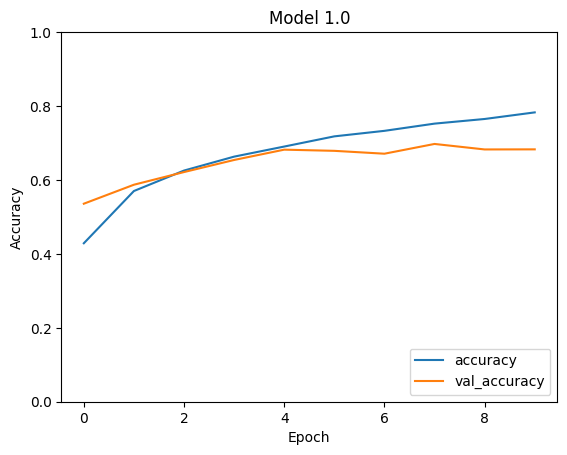

In [ ]:
print('>>> Evaluating the model...')
print('>>> Calculating model loss and accuracy...')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model 1.0')

test_loss, test_acc = model.evaluate(val_images, val_labels, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

### Save the trained model

In [ ]:
print('>>> Saving the trained model...')
model_name = 'CIFAR10_CNN.h5'
model.save(model_name)
print('>>> Model saved...')

>>> Saving the trained model...
>>> Model saved...


### Load the trained model and use it over test data

In [ ]:
print('>>> Loading the trained model...')
loaded_model = keras.models.load_model(model_name)
print('>>> Model loaded...')

print('>>> Using the trained model over test data...')
y_test_predictions_vectorized = loaded_model.predict(test_images)
y_test_predictions = np.argmax(y_test_predictions_vectorized, axis=1)
print('>>> Predictions made over test data...')

>>> Loading the trained model...
>>> Model loaded...
>>> Using the trained model over test data...
313/313 [==============================] - 3s 8ms/step
>>> Predictions made over test data...


### Calculate metric scores
Accuracy, precision, recall, f1 score

In [ ]:
# calculate the scores
print('>>> Calculating metric scores...')
acc_test = accuracy_score(test_labels, y_test_predictions)
pre_test = precision_score(test_labels, y_test_predictions, average='macro')
rec_test = recall_score(test_labels, y_test_predictions, average='macro')
f1_test = f1_score(test_labels, y_test_predictions, average='macro')

# print the scores
print('Accuracy score of the classifier is: {:.2f}.'.format(acc_test))
print('Precision score of the classifier is: {:.2f}.'.format(pre_test))
print('Recall score of the classifier is: {:.2f}.'.format(rec_test))
print('F1 score of the classifier is: {:.2f}.'.format(f1_test))

>>> Calculating metric scores...
Accuracy score of the classifier is: 0.68.
Precision score of the classifier is: 0.71.
Recall score of the classifier is: 0.68.
F1 score of the classifier is: 0.69.


### Confusion matrix

Show TP, TN, FP, FN

In [ ]:
# compute confusion matrix
print('>>> Computing the confusion matrix...')
conf_matrix = confusion_matrix(test_labels, y_test_predictions)

print('>>> Calculating TP, TN, FP, FN for each class...')
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# print results
for i in range(len(TP)):
    print(f"TP for class {i}: {TP[i]}\t TN for class {i}: {TN[i]}\t FP for class {i}: {FP[i]}\t FN for class {i}: {FN[i]}\t")

>>> Computing the confusion matrix...
>>> Calculating TP, TN, FP, FN for each class...
TP for class 0: 790	 TN for class 0: 8603	 FP for class 0: 397	 FN for class 0: 210	
TP for class 1: 831	 TN for class 1: 8826	 FP for class 1: 174	 FN for class 1: 169	
TP for class 2: 530	 TN for class 2: 8740	 FP for class 2: 260	 FN for class 2: 470	
TP for class 3: 584	 TN for class 3: 8217	 FP for class 3: 783	 FN for class 3: 416	
TP for class 4: 510	 TN for class 4: 8825	 FP for class 4: 175	 FN for class 4: 490	
TP for class 5: 708	 TN for class 5: 8292	 FP for class 5: 708	 FN for class 5: 292	
TP for class 6: 646	 TN for class 6: 8882	 FP for class 6: 118	 FN for class 6: 354	
TP for class 7: 713	 TN for class 7: 8763	 FP for class 7: 237	 FN for class 7: 287	
TP for class 8: 785	 TN for class 8: 8831	 FP for class 8: 169	 FN for class 8: 215	
TP for class 9: 731	 TN for class 9: 8849	 FP for class 9: 151	 FN for class 9: 269	


### Illustrate a few results

Based on the classifier prediction

>>> Illustrating a few results...
>>> Plotting 4 images of each class based on classifier prediction...


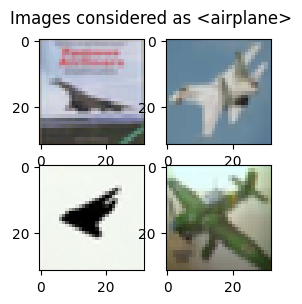

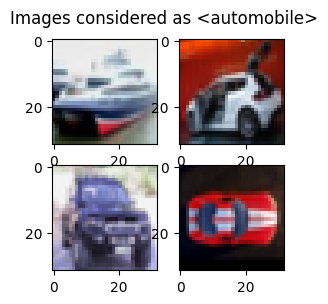

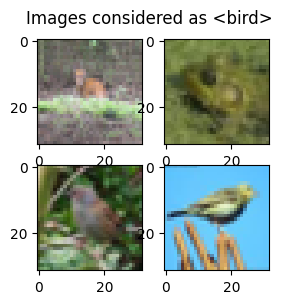

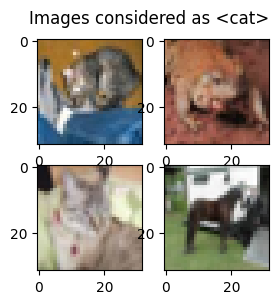

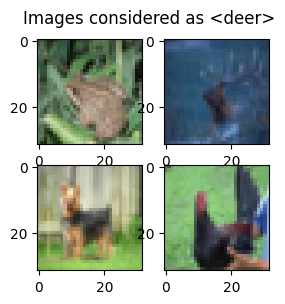

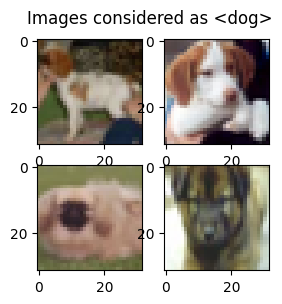

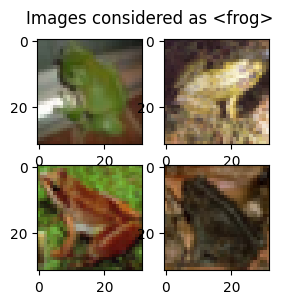

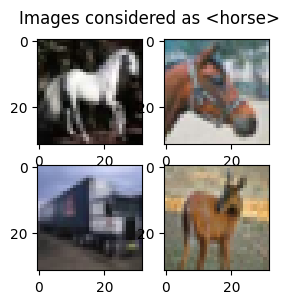

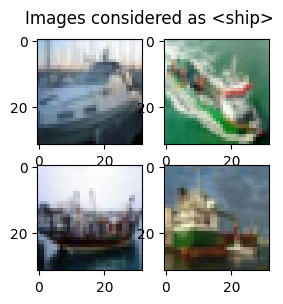

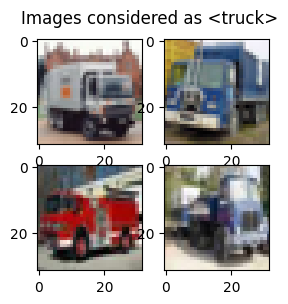

In [ ]:
print('>>> Illustrating a few results...')
print('>>> Plotting 4 images of each class based on classifier prediction...')

# Store the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_to_demonstrate = 0
while (sum(y_test_predictions == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_test_predictions == class_to_demonstrate)

    # create new plot window
    # small figsize to see images more clearly
    plt.figure(figsize=(3,3))

    # plot 4 images as gray scale
    plt.subplot(221)
    plt.imshow(test_images[tmp_idxs_to_use[0][0]])
    plt.subplot(222)
    plt.imshow(test_images[tmp_idxs_to_use[0][1]])
    plt.subplot(223)
    plt.imshow(test_images[tmp_idxs_to_use[0][2]])
    plt.subplot(224)
    plt.imshow(test_images[tmp_idxs_to_use[0][3]])
    tmp_title = 'Images considered as <' + str(class_names[class_to_demonstrate] + '>')
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1


## Version 2.0

Using a different loss function during model training

---



### Transform to one-hot-encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
one_hot_train = onehotencoder.fit_transform(y_train[:,0:1]).toarray()
one_hot_val = onehotencoder.fit_transform(val_labels[:,0:1]).toarray()

# print(len(one_hot_train))
# print(len(one_hot_val))

### Duplicate the model

In [ ]:
model2 = model

### Compile and train the model

*duration of this cell execution: 10-15 minutes*

In [ ]:
print('>>> Compiling model version 2.0...')
model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalHinge(),
              metrics=['accuracy'])
print('>>> Model 2.0 compiled...')

print('>>> Training the model 2.0...')
print('>>> This may take a while...')
history = model2.fit(X_train, one_hot_train, epochs=10,
                    validation_data=(val_images, one_hot_val))
print('>>> Model 2.0 training done...')

>>> Compiling model version 2.0...
>>> Model 2.0 compiled...
>>> Training the model 2.0...
>>> This may take a while...
Epoch 1/10
1172/1172 [==============================] - 41s 34ms/step - loss: 0.5098 - accuracy: 0.7858 - val_loss: 0.7562 - val_accuracy: 0.6953
Epoch 2/10
1172/1172 [==============================] - 38s 33ms/step - loss: 0.4717 - accuracy: 0.8009 - val_loss: 0.7462 - val_accuracy: 0.6991
Epoch 3/10
1172/1172 [==============================] - 36s 31ms/step - loss: 0.4461 - accuracy: 0.8118 - val_loss: 0.7447 - val_accuracy: 0.6971
Epoch 4/10
1172/1172 [==============================] - 37s 31ms/step - loss: 0.4250 - accuracy: 0.8218 - val_loss: 0.7753 - val_accuracy: 0.6878
Epoch 5/10
1172/1172 [==============================] - 37s 32ms/step - loss: 0.4087 - accuracy: 0.8291 - val_loss: 0.8021 - val_accuracy: 0.6795
Epoch 6/10
1172/1172 [==============================] - 37s 32ms/step - loss: 0.3825 - accuracy: 0.8409 - val_loss: 0.7914 - val_accuracy: 0.6954
Epoc

### Evaluate the model

>>> Evaluating the model...
>>> Calculating model loss and accuracy...
391/391 - 3s - loss: 0.8557 - accuracy: 0.6885 - 3s/epoch - 7ms/step
Test loss: 0.8557133674621582
Test accuracy: 0.688480019569397


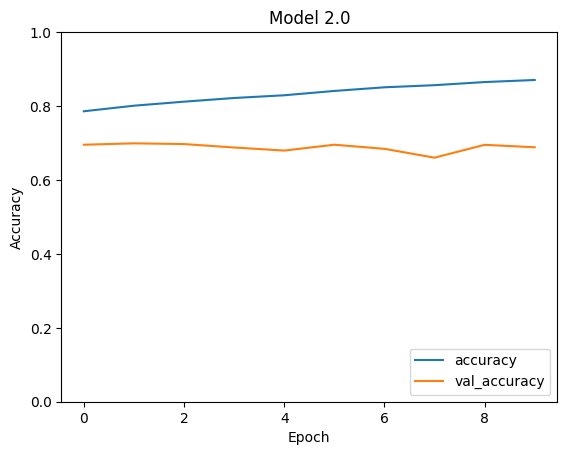

In [ ]:
print('>>> Evaluating the model...')
print('>>> Calculating model loss and accuracy...')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model 2.0')

test_loss2, test_acc2 = model2.evaluate(val_images, one_hot_val, verbose=2)
print('Test loss:', test_loss2)
print('Test accuracy:', test_acc2)

### Save the trained model

In [ ]:
print('>>> Saving the trained model...')
model_name_2 = 'CIFAR10_CNN_2.h5'
model2.save(model_name_2)
print('>>> Model saved...')

>>> Saving the trained model...
>>> Model saved...


### Load the trained model and use it over test data

In [ ]:
print('>>> Loading the trained model...')
loaded_model = keras.models.load_model(model_name_2)
print('>>> Model loaded...')

print('>>> Using the trained model over test data...')
y_test_predictions_vectorized = loaded_model.predict(test_images)
y_test_predictions = np.argmax(y_test_predictions_vectorized, axis=1)
print('>>> Predictions made over test data...')

>>> Loading the trained model...
>>> Model loaded...
>>> Using the trained model over test data...
313/313 [==============================] - 4s 13ms/step
>>> Predictions made over test data...


### Calculate metric scores
Accuracy, precision, recall, f1 score

In [ ]:
# calculate the scores
print('>>> Calculating metric scores...')
acc_test = accuracy_score(test_labels, y_test_predictions)
pre_test = precision_score(test_labels, y_test_predictions, average='macro')
rec_test = recall_score(test_labels, y_test_predictions, average='macro')
f1_test = f1_score(test_labels, y_test_predictions, average='macro')

# print the scores
print('Accuracy score of the classifier is: {:.2f}.'.format(acc_test))
print('Precision score of the classifier is: {:.2f}.'.format(pre_test))
print('Recall score of the classifier is: {:.2f}.'.format(rec_test))
print('F1 score of the classifier is: {:.2f}.'.format(f1_test))

>>> Calculating metric scores...
Accuracy score of the classifier is: 0.68.
Precision score of the classifier is: 0.69.
Recall score of the classifier is: 0.68.
F1 score of the classifier is: 0.68.


### Confusion matrix

Show TP, TN, FP, FN

In [ ]:
# compute confusion matrix
print('>>> Computing the confusion matrix...')
conf_matrix = confusion_matrix(test_labels, y_test_predictions)

print('>>> Calculating TP, TN, FP, FN for each class...')
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# print results
for i in range(len(TP)):
    print(f"TP for class {i}: {TP[i]}\t TN for class {i}: {TN[i]}\t FP for class {i}: {FP[i]}\t FN for class {i}: {FN[i]}\t")

>>> Computing the confusion matrix...
>>> Calculating TP, TN, FP, FN for each class...
TP for class 0: 711	 TN for class 0: 8671	 FP for class 0: 329	 FN for class 0: 289	
TP for class 1: 806	 TN for class 1: 8842	 FP for class 1: 158	 FN for class 1: 194	
TP for class 2: 611	 TN for class 2: 8469	 FP for class 2: 531	 FN for class 2: 389	
TP for class 3: 517	 TN for class 3: 8421	 FP for class 3: 579	 FN for class 3: 483	
TP for class 4: 647	 TN for class 4: 8619	 FP for class 4: 381	 FN for class 4: 353	
TP for class 5: 554	 TN for class 5: 8600	 FP for class 5: 400	 FN for class 5: 446	
TP for class 6: 635	 TN for class 6: 8881	 FP for class 6: 119	 FN for class 6: 365	
TP for class 7: 743	 TN for class 7: 8708	 FP for class 7: 292	 FN for class 7: 257	
TP for class 8: 807	 TN for class 8: 8782	 FP for class 8: 218	 FN for class 8: 193	
TP for class 9: 753	 TN for class 9: 8791	 FP for class 9: 209	 FN for class 9: 247	


### Illustrate a few results

Based on the classifier prediction

>>> Illustrating a few results...
>>> Plotting 4 images of each class based on classifier prediction...


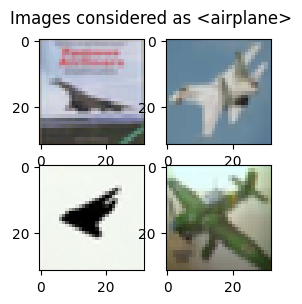

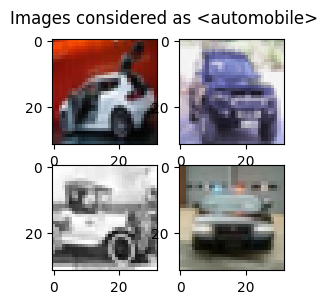

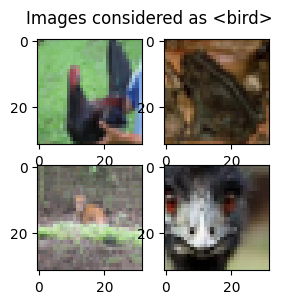

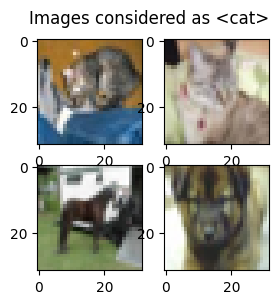

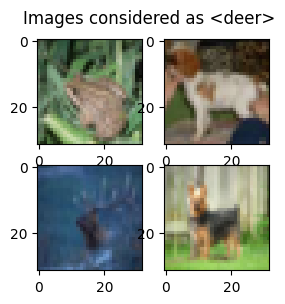

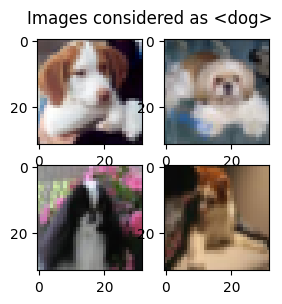

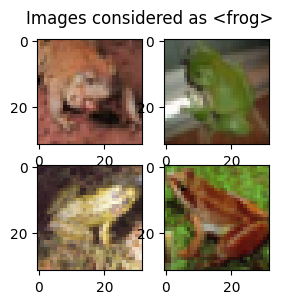

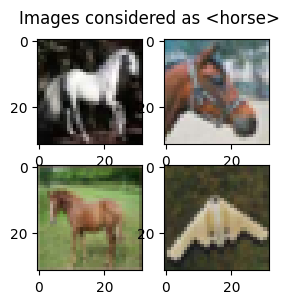

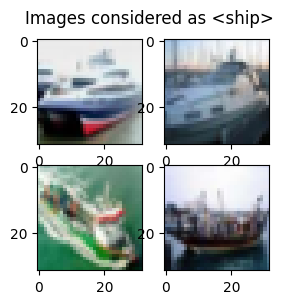

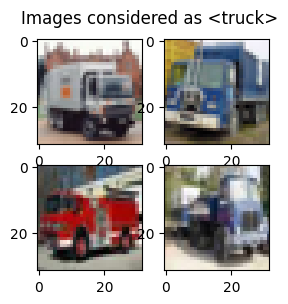

In [ ]:
print('>>> Illustrating a few results...')
print('>>> Plotting 4 images of each class based on classifier prediction...')

# Store the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_to_demonstrate = 0
while (sum(y_test_predictions == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_test_predictions == class_to_demonstrate)

    # create new plot window
    # small figsize to see images more clearly
    plt.figure(figsize=(3,3))

    # plot 4 images as gray scale
    plt.subplot(221)
    plt.imshow(test_images[tmp_idxs_to_use[0][0]])
    plt.subplot(222)
    plt.imshow(test_images[tmp_idxs_to_use[0][1]])
    plt.subplot(223)
    plt.imshow(test_images[tmp_idxs_to_use[0][2]])
    plt.subplot(224)
    plt.imshow(test_images[tmp_idxs_to_use[0][3]])
    tmp_title = 'Images considered as <' + str(class_names[class_to_demonstrate] + '>')
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1
# cmap=plt.get_cmap('gray')

## Version 3.0

Using a more complicated model architecture

---



### Create the model 3.0

In [ ]:
print('>>> Creating the model 3.0...')
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))


model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))


model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10))

>>> Creating the model 3.0...


Here's the complete architecture of the model:

In [ ]:
print('>>> Model created...')
print('>>> Checking model architecture...')
model3.summary()

>>> Model created...
>>> Checking model architecture...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                

### Compile and train the model

*duration of this cell execution: 10-15 minutes*

In [ ]:
print('>>> Compiling the model 3.0...')
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print('>>> Model 3.0 compiled...')

print('>>> Training the model 3.0...')
print('>>> This may take a while...')
history = model3.fit(X_train, y_train, epochs=10,
                    validation_data=(val_images, val_labels))
print('>>> Model 3.0 training done...')

>>> Compiling the model 3.0...
>>> Model 3.0 compiled...
>>> Training the model 3.0...
>>> This may take a while...
Epoch 1/10
1172/1172 [==============================] - 44s 35ms/step - loss: 1.6883 - accuracy: 0.3679 - val_loss: 1.4014 - val_accuracy: 0.4911
Epoch 2/10
1172/1172 [==============================] - 44s 38ms/step - loss: 1.3194 - accuracy: 0.5234 - val_loss: 1.2330 - val_accuracy: 0.5610
Epoch 3/10
1172/1172 [==============================] - 40s 34ms/step - loss: 1.1722 - accuracy: 0.5809 - val_loss: 1.1225 - val_accuracy: 0.6041
Epoch 4/10
1172/1172 [==============================] - 39s 34ms/step - loss: 1.0709 - accuracy: 0.6195 - val_loss: 1.0724 - val_accuracy: 0.6227
Epoch 5/10
1172/1172 [==============================] - 38s 33ms/step - loss: 0.9951 - accuracy: 0.6478 - val_loss: 1.0480 - val_accuracy: 0.6330
Epoch 6/10
1172/1172 [==============================] - 40s 34ms/step - loss: 0.9347 - accuracy: 0.6677 - val_loss: 1.0228 - val_accuracy: 0.6457
Epoch 7/

### Evaluate the model

>>> Evaluating the model 3.0...
>>> Calculating model loss and accuracy...
391/391 - 4s - loss: 0.9555 - accuracy: 0.6761 - 4s/epoch - 10ms/step
Test loss: 0.9555256962776184
Test accuracy: 0.6760799884796143


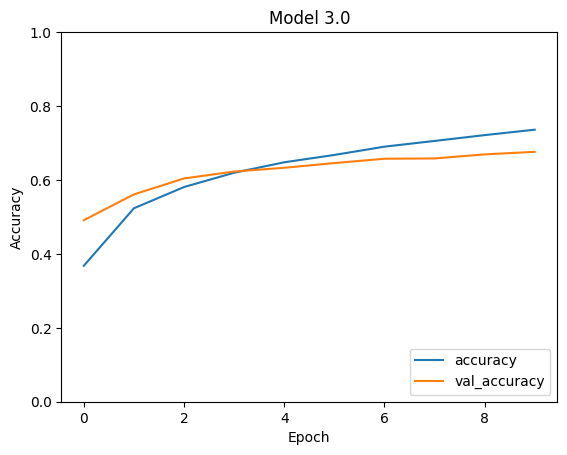

In [ ]:
print('>>> Evaluating the model 3.0...')
print('>>> Calculating model loss and accuracy...')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model 3.0')

test_loss, test_acc = model3.evaluate(val_images, val_labels, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

### Save the trained model

In [ ]:
print('>>> Saving the trained model 3.0...')
model_name = 'CIFAR10_CNN_3.h5'
model3.save(model_name)
print('>>> Model 3.0 saved...')

>>> Saving the trained model 3.0...
>>> Model 3.0 saved...


### Load the trained model and use it over test data

In [ ]:
print('>>> Loading the trained model 3.0...')
loaded_model = keras.models.load_model(model_name)
print('>>> Model 3.0 loaded...')

print('>>> Using the trained model 3.0 over test data...')
y_test_predictions_vectorized = loaded_model.predict(test_images)
y_test_predictions = np.argmax(y_test_predictions_vectorized, axis=1)
print('>>> Predictions made over test data...')

>>> Loading the trained model 3.0...
>>> Model 3.0 loaded...
>>> Using the trained model 3.0 over test data...
313/313 [==============================] - 3s 8ms/step
>>> Predictions made over test data...


### Calculate metric scores
Accuracy, precision, recall, f1 score

In [ ]:
# calculate the scores
print('>>> Calculating metric scores...')
acc_test = accuracy_score(test_labels, y_test_predictions)
pre_test = precision_score(test_labels, y_test_predictions, average='macro')
rec_test = recall_score(test_labels, y_test_predictions, average='macro')
f1_test = f1_score(test_labels, y_test_predictions, average='macro')

# print the scores
print('Accuracy score of the classifier is: {:.2f}.'.format(acc_test))
print('Precision score of the classifier is: {:.2f}.'.format(pre_test))
print('Recall score of the classifier is: {:.2f}.'.format(rec_test))
print('F1 score of the classifier is: {:.2f}.'.format(f1_test))

>>> Calculating metric scores...
Accuracy score of the classifier is: 0.67.
Precision score of the classifier is: 0.68.
Recall score of the classifier is: 0.67.
F1 score of the classifier is: 0.67.


### Confusion matrix

Show TP, TN, FP, FN

In [ ]:
# compute confusion matrix
print('>>> Computing the confusion matrix...')
conf_matrix = confusion_matrix(test_labels, y_test_predictions)

print('>>> Calculating TP, TN, FP, FN for each class...')
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# print results
for i in range(len(TP)):
    print(f"TP for class {i}: {TP[i]}\t TN for class {i}: {TN[i]}\t FP for class {i}: {FP[i]}\t FN for class {i}: {FN[i]}\t")

>>> Computing the confusion matrix...
>>> Calculating TP, TN, FP, FN for each class...
TP for class 0: 803	 TN for class 0: 8545	 FP for class 0: 455	 FN for class 0: 197	
TP for class 1: 754	 TN for class 1: 8896	 FP for class 1: 104	 FN for class 1: 246	
TP for class 2: 573	 TN for class 2: 8535	 FP for class 2: 465	 FN for class 2: 427	
TP for class 3: 454	 TN for class 3: 8597	 FP for class 3: 403	 FN for class 3: 546	
TP for class 4: 622	 TN for class 4: 8574	 FP for class 4: 426	 FN for class 4: 378	
TP for class 5: 609	 TN for class 5: 8506	 FP for class 5: 494	 FN for class 5: 391	
TP for class 6: 824	 TN for class 6: 8559	 FP for class 6: 441	 FN for class 6: 176	
TP for class 7: 690	 TN for class 7: 8774	 FP for class 7: 226	 FN for class 7: 310	
TP for class 8: 678	 TN for class 8: 8859	 FP for class 8: 141	 FN for class 8: 322	
TP for class 9: 699	 TN for class 9: 8861	 FP for class 9: 139	 FN for class 9: 301	


### Illustrate a few results

Based on the classifier prediction

>>> Illustrating a few results...
>>> Plotting 4 images of each class based on classifier prediction...


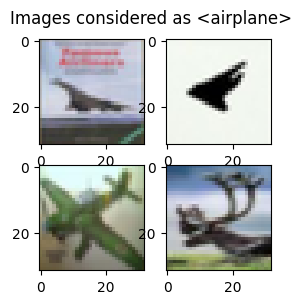

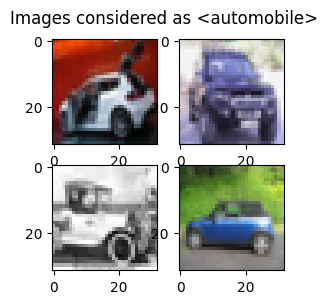

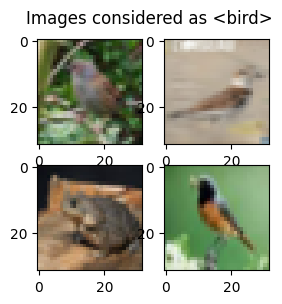

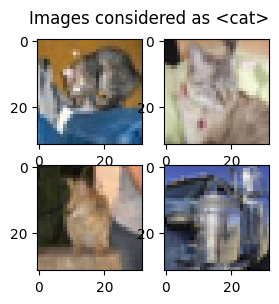

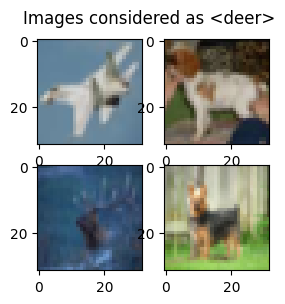

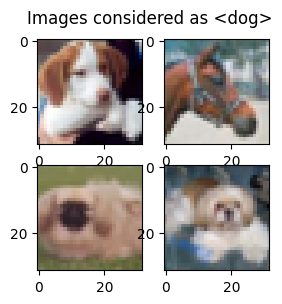

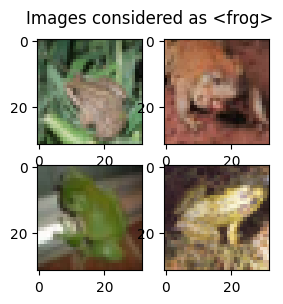

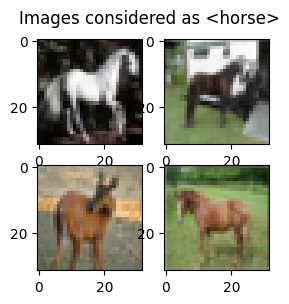

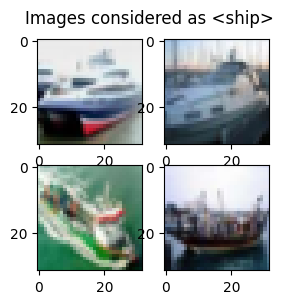

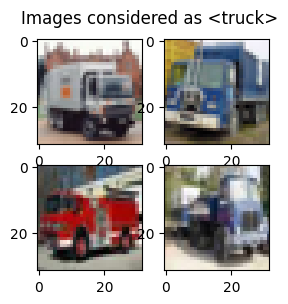

In [ ]:
print('>>> Illustrating a few results...')
print('>>> Plotting 4 images of each class based on classifier prediction...')

# Store the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_to_demonstrate = 0
while (sum(y_test_predictions == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_test_predictions == class_to_demonstrate)

    # create new plot window
    # small figsize to see images more clearly
    plt.figure(figsize=(3,3))

    # plot 4 images as gray scale
    plt.subplot(221)
    plt.imshow(test_images[tmp_idxs_to_use[0][0]])
    plt.subplot(222)
    plt.imshow(test_images[tmp_idxs_to_use[0][1]])
    plt.subplot(223)
    plt.imshow(test_images[tmp_idxs_to_use[0][2]])
    plt.subplot(224)
    plt.imshow(test_images[tmp_idxs_to_use[0][3]])
    tmp_title = 'Images considered as <' + str(class_names[class_to_demonstrate] + '>')
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1
